In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Prana\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
data = pd.read_csv("virtualInternshipData_ADS2001.csv", encoding='latin1')

In [3]:
data.head()

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
0,1,1,a,1,PRNLT,Hello team. Welcome to Nephrotex!,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,5
1,2,1,a,2,PRNLT,I'm Maria Williams. I'll be your design adviso...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,11
2,3,1,a,3,PRNLT,I'm here to help if you have any questions.,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,9
3,4,1,a,4,PRNLT,Please introduce yourselves with the name you ...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,1,0,0,4,51
4,5,1,a,5,PRNLT,I just want to make sure everyone has found th...,2,Mentor,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,39


In [4]:
len(data['implementation'].unique())

15

In [5]:
sns.set_style('dark')

In [6]:
data.describe()

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
count,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000,19180.000000
mean,9590.500000,202.433212,9592.793796,3.916736,0.028728,0.102868,0.187018,0.018144,0.052242,0.021064,3.741606,12.489520
std,5536.933417,118.355170,5537.800672,1.397935,0.167045,0.303794,0.389936,0.133475,0.222520,0.143600,1.464839,14.117233
min,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4795.750000,96.000000,4796.750000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,4.000000
50%,9590.500000,204.000000,9593.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,9.000000
75%,14385.250000,317.000000,14388.250000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,17.000000
max,19180.000000,393.000000,19183.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1032.000000


<ipython-input-7-bc783dd8989c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="OutcomeScore", y="wordCount", data=data, palette = "RdPu")


<AxesSubplot:xlabel='OutcomeScore', ylabel='wordCount'>

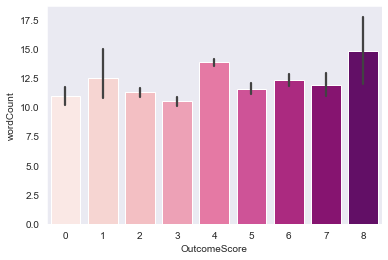

In [7]:
sns.barplot(x="OutcomeScore", y="wordCount", data=data, palette = "RdPu")

In [8]:
data = data.dropna()

In [9]:
data = data[data.RoleName == 'Player']

In [10]:
np.amax(data, axis = 0)

Unnamed: 0                                                                           19179
userIDs                                                                                393
implementation                                                                           o
Line_ID                                                                              19182
ChatGroup                                                                              PSF
content                                  zach you can find xiang's design on the FEEDS ...
group_id                                                                                 6
RoleName                                                                            Player
roomName                                               Team designs batch using 1 material
m_experimental_testing                                                                   1
m_making_design_choices                                                                  1

In [11]:
data.loc[data['wordCount'] == 1032]

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
2766,2767,69,c,2768,PRNLT,1.As soon as you submit a notebook to Alex he ...,2,Player,Introduction and Workflow Tutorial with Entran...,0,1,0,0,0,0,1,1032


In [12]:
data = data.drop([2766])

<ipython-input-13-bc783dd8989c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="OutcomeScore", y="wordCount", data=data, palette = "RdPu")


<AxesSubplot:xlabel='OutcomeScore', ylabel='wordCount'>

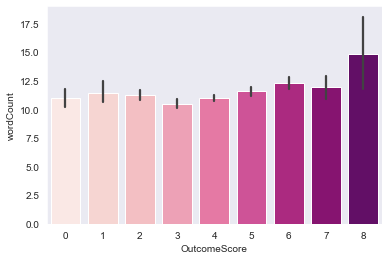

In [13]:
sns.barplot(x="OutcomeScore", y="wordCount", data=data, palette = "RdPu")

In [14]:
bygroup = data.groupby(['group_id']).mean()

In [15]:
bygroup

,Unnamed: 0,userIDs,Line_ID,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
group_id,,,,,,,,,,,
2,9391.824028,201.033935,9394.114395,0.027915,0.095238,0.168856,0.017241,0.055282,0.011768,3.411604,11.192939
3,9540.298437,202.492480,9542.683869,0.017989,0.098201,0.177234,0.025361,0.051017,0.012091,3.672073,11.787673
4,9607.404532,203.730138,9609.689242,0.040115,0.092993,0.167752,0.014587,0.048711,0.009377,3.781714,10.135191
5,10067.060302,211.954774,10069.413065,0.037186,0.119263,0.173869,0.018090,0.053601,0.010050,4.087102,11.980905
6,10050.860818,212.748021,10053.099934,0.030013,0.103562,0.176451,0.014512,0.059037,0.011214,3.636873,11.156003


<ipython-input-16-e8a321295e98>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = bygroup.index, y = bygroup.OutcomeScore, palette = "RdPu")


<AxesSubplot:xlabel='group_id', ylabel='OutcomeScore'>

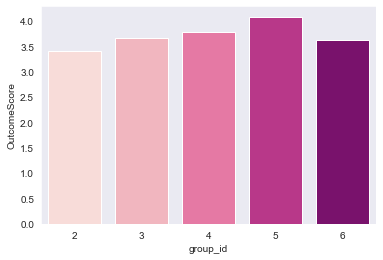

In [16]:
sns.barplot(x = bygroup.index, y = bygroup.OutcomeScore, palette = "RdPu")

In [17]:
byuser = data.groupby(['userIDs']).mean()


In [18]:
byuser.tail()

,Unnamed: 0,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
userIDs,,,,,,,,,,,
389,19011.108696,19014.108696,6.0,0.043478,0.173913,0.086957,0.021739,0.152174,0.0,7.0,16.413043
390,19023.895833,19026.895833,6.0,0.000000,0.104167,0.125000,0.020833,0.041667,0.0,4.0,8.979167
391,19027.352941,19030.352941,6.0,0.039216,0.058824,0.215686,0.019608,0.078431,0.0,5.0,11.862745
392,19023.333333,19026.333333,6.0,0.055556,0.111111,0.111111,0.000000,0.055556,0.0,5.0,12.527778
393,19020.611111,19023.611111,6.0,0.069444,0.083333,0.111111,0.013889,0.097222,0.0,4.0,12.055556


<AxesSubplot:xlabel='userIDs', ylabel='OutcomeScore'>

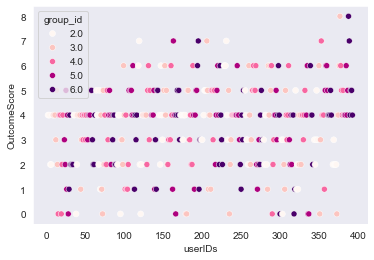

In [19]:
sns.scatterplot(x = byuser.index, y = byuser.OutcomeScore,hue = byuser.group_id, palette = 'RdPu')

In [20]:
byuser['group_id'].unique()

array([2., 3., 4., 5., 6.])

In [21]:
data

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
5,6,2,a,6,PRNLT,Hello I am Brandon!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,4
6,7,3,a,7,PRNLT,I am Zelin,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3
7,8,3,a,8,PRNLT,Hi,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,1
8,9,4,a,9,PRNLT,i am jack,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3
9,10,5,a,10,PRNLT,Hey! I'm Rachel!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,19174,391,o,19177,PESPVP,exactly!,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19174,19175,389,o,19178,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,7,2
19175,19176,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1
19176,19177,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2


In [22]:
for i in data.group_id.unique():
  print('Group', i, 'average score is', data[data.group_id == i].OutcomeScore.mean())

Group 2 average score is 3.4116037219485493
Group 3 average score is 3.672073134768505
Group 4 average score is 3.781713988017713
Group 5 average score is 4.0871021775544385
Group 6 average score is 3.6368733509234827


WEEK 4: Dropped NAs, google colab made, grouped by group id, grouped by user id, found averages, found mentors jump between groups.

In [23]:
topicdata = data.iloc[:, 9:15]
topicdata

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0
...,...,...,...,...,...,...
19173,0,0,0,0,0,0
19174,0,0,0,0,0,0
19175,0,0,0,0,0,0
19176,0,0,0,0,0,0


In [24]:
topicdata['None'] = 0
nones = topicdata.pop('None')
topicdata.insert(0, 'None', nones)
topicdata

,None,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
19173,0,0,0,0,0,0,0
19174,0,0,0,0,0,0,0
19175,0,0,0,0,0,0,0
19176,0,0,0,0,0,0,0


In [25]:
topicdata['topic'] = topicdata.idxmax(1)
topicdata.head()

,None,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,topic
5,0,0,0,0,0,0,0,None
6,0,0,0,0,0,0,0,None
7,0,0,0,0,0,0,0,None
8,0,0,0,0,0,0,0,None
9,0,0,0,0,0,0,0,None


WEEK 4 post class: created a subset containing just topic of chat. used idxmax function to reverse one hot encode to make the topic categorical data. created a none column so that rows with no topic print "None" in the topic column.

In [26]:
data = data.join(topicdata['topic'])

<ipython-input-27-c2aed4ac0cd0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data.topic, y = data.OutcomeScore, palette = 'RdPu')
<ipython-input-27-c2aed4ac0cd0>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


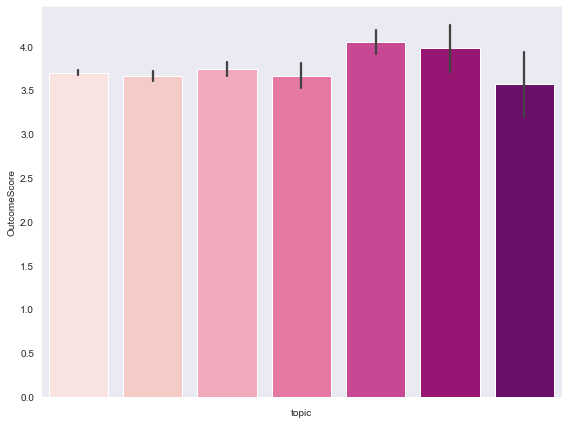

In [27]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = data.topic, y = data.OutcomeScore, palette = 'RdPu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<ipython-input-28-ac95a303df16>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = data.group_id, y = data.OutcomeScore, palette = 'RdPu')
<ipython-input-28-ac95a303df16>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


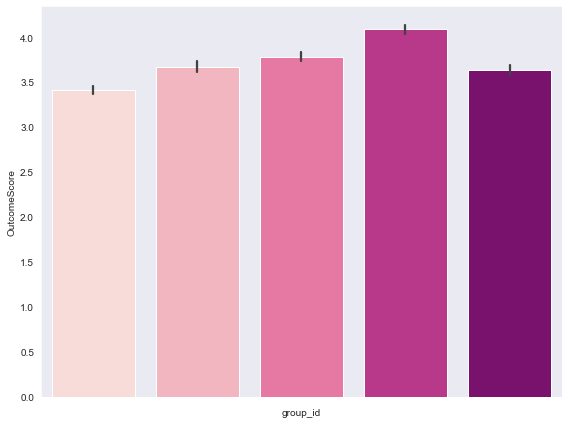

In [28]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x = data.group_id, y = data.OutcomeScore, palette = 'RdPu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='group_id', ylabel='OutcomeScore'>

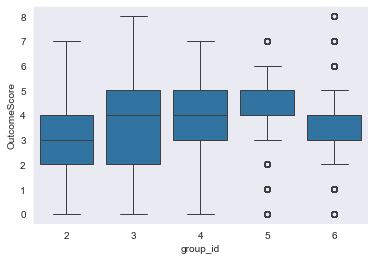

In [29]:
sns.boxplot(x=data.group_id, y=data.OutcomeScore, showfliers=True)

In [30]:
for i in data.group_id.unique():
    print('Group', i, 'total player count is', data[data.group_id == i].userIDs.count())

Group 2 total player count is 3654
Group 3 total player count is 3391
Group 4 total player count is 3839
Group 5 total player count is 2985
Group 6 total player count is 3032


In [31]:
moves = ['m_experimental_testing','m_making_design_choices','m_asking_questions']
justif = ['j_customer_consultants_requests','j_performance_parameters_requirements','j_communication']
uhhh = [data.OutcomeScore[(data.group_id == i) & (data.implementation == j)].unique().mean() for i in data.group_id.unique() for j in data.implementation.unique()]
data['bettergroupname'] = data.group_id.astype(str) + data.implementation
uhh = data[moves+justif+['bettergroupname','OutcomeScore']].groupby(['bettergroupname']).sum()
uhh

,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore
bettergroupname,,,,,,,
2a,10,21,54,2,21,1,1076
2b,2,25,21,4,9,2,408
2c,8,31,99,8,27,5,1526
2d,6,29,40,4,8,2,968
2e,1,6,29,3,6,1,568
...,...,...,...,...,...,...,...
6k,2,19,22,3,7,4,474
6l,3,12,30,0,7,3,770
6m,9,23,48,4,8,1,822


<ipython-input-32-a30c124e8111>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ab = sns.scatterplot(x = uhh.index, y = uhh.OutcomeScore, palette = 'RdPu')
<ipython-input-32-a30c124e8111>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ab.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


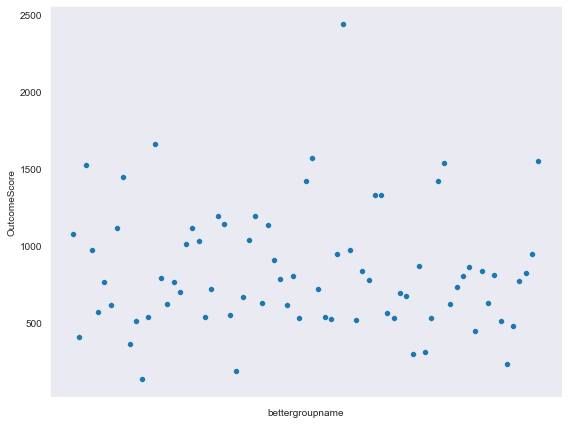

In [32]:

plt.figure(figsize=(8,6))
ab = sns.scatterplot(x = uhh.index, y = uhh.OutcomeScore, palette = 'RdPu')
ab.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [33]:
byimp = data.groupby(['implementation']).mean()
byimp

,Unnamed: 0,userIDs,Line_ID,group_id,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount
implementation,,,,,,,,,,,,
a,722.956739,18.014975,722.956739,3.965058,0.037438,0.106489,0.168053,0.011647,0.070715,0.010815,2.877704,11.641431
b,2056.859259,49.322222,2057.859259,4.161111,0.032407,0.076852,0.149074,0.020370,0.051852,0.012963,3.583333,10.485185
c,3542.234525,74.891334,3543.234525,3.645117,0.024072,0.088033,0.225585,0.008941,0.053645,0.007565,3.241403,11.438790
d,5248.226238,103.499331,5249.226238,4.028782,0.026774,0.095047,0.180054,0.012718,0.033467,0.011379,3.315261,9.345382
e,6662.750484,130.719536,6665.750484,3.954545,0.020309,0.121857,0.179884,0.021277,0.044487,0.018375,3.936170,11.927466
f,7849.780412,157.502062,7852.780412,3.902062,0.024742,0.114433,0.231959,0.024742,0.082474,0.012371,4.109278,13.414433
g,8822.013441,185.616935,8825.013441,3.998656,0.034946,0.112903,0.186828,0.024194,0.069892,0.016129,3.815860,12.801075
h,9855.798051,212.824624,9858.798051,3.914969,0.015943,0.084145,0.139947,0.010629,0.037201,0.007972,4.207263,8.751107
i,11231.716617,239.324184,11234.716617,3.742582,0.041543,0.092730,0.195104,0.025223,0.045994,0.011869,4.003709,10.535608


In [34]:
data

,Unnamed: 0,userIDs,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount,topic,bettergroupname
5,6,2,a,6,PRNLT,Hello I am Brandon!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,4,None,2a
6,7,3,a,7,PRNLT,I am Zelin,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3,None,2a
7,8,3,a,8,PRNLT,Hi,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,1,None,2a
8,9,4,a,9,PRNLT,i am jack,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,4,3,None,2a
9,10,5,a,10,PRNLT,Hey! I'm Rachel!,2,Player,Introduction and Workflow Tutorial with Entran...,0,0,0,0,0,0,2,3,None,2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,19174,391,o,19177,PESPVP,exactly!,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1,None,6o
19174,19175,389,o,19178,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,7,2,None,6o
19175,19176,392,o,19179,PESPVP,yes,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,5,1,None,6o
19176,19177,388,o,19180,PESPVP,sounds good,6,Player,Reflection team discussion of first batch results,0,0,0,0,0,0,8,2,None,6o


In [35]:
data_content_sentiment = data[['userIDs', 'content']]

data_content_sentiment

,userIDs,content
5,2,Hello I am Brandon!
6,3,I am Zelin
7,3,Hi
8,4,i am jack
9,5,Hey! I'm Rachel!
...,...,...
19173,391,exactly!
19174,389,sounds good
19175,392,yes
19176,388,sounds good


In [36]:
sid = SentimentIntensityAnalyzer()
data_content_sentiment.reset_index(inplace=True, drop=True)
data_content_sentiment[['neg', 'neu', 'pos', 'compound']] = data_content_sentiment['content'].apply(sid.polarity_scores).apply(pd.Series)
data_content_sentiment

C:\Users\Prana\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,userIDs,content,neg,neu,pos,compound
0,2,Hello I am Brandon!,0.0,1.000,0.000,0.0000
1,3,I am Zelin,0.0,1.000,0.000,0.0000
2,3,Hi,0.0,1.000,0.000,0.0000
3,4,i am jack,0.0,1.000,0.000,0.0000
4,5,Hey! I'm Rachel!,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...
16896,391,exactly!,0.0,1.000,0.000,0.0000
16897,389,sounds good,0.0,0.256,0.744,0.4404
16898,392,yes,0.0,0.000,1.000,0.4019
16899,388,sounds good,0.0,0.256,0.744,0.4404


In [37]:
data_sentiment_nice = data_content_sentiment.drop(['content'],axis = 1)
data_sentiment_nice

,userIDs,neg,neu,pos,compound
0,2,0.0,1.000,0.000,0.0000
1,3,0.0,1.000,0.000,0.0000
2,3,0.0,1.000,0.000,0.0000
3,4,0.0,1.000,0.000,0.0000
4,5,0.0,1.000,0.000,0.0000
...,...,...,...,...,...
16896,391,0.0,1.000,0.000,0.0000
16897,389,0.0,0.256,0.744,0.4404
16898,392,0.0,0.000,1.000,0.4019
16899,388,0.0,0.256,0.744,0.4404


In [38]:
user_sentiments = data_sentiment_nice.groupby(['userIDs']).mean()

In [39]:
sums = user_sentiments["neg"]+user_sentiments["neu"]+user_sentiments["pos"]
user_sentiments['sums'] = sums
user_sentiments

,neg,neu,pos,compound,sums
userIDs,,,,,
2,0.041415,0.703785,0.239415,0.207451,0.984615
3,0.049909,0.764182,0.095000,-0.002686,0.909091
4,0.087226,0.769161,0.111355,0.116997,0.967742
5,0.069044,0.694511,0.191978,0.105669,0.955533
6,0.072351,0.723676,0.204000,0.206205,1.000027
...,...,...,...,...,...
389,0.024152,0.750130,0.225696,0.323720,0.999978
390,0.026750,0.713667,0.259583,0.213281,1.000000
391,0.034647,0.693824,0.271529,0.251153,1.000000


In [40]:
byuser = data.groupby(['userIDs']).mean()
byuser
outcomes = byuser["OutcomeScore"]
user_sentiments["OutcomeScore"] = byuser["OutcomeScore"]
user_sentiments

,neg,neu,pos,compound,sums,OutcomeScore
userIDs,,,,,,
2,0.041415,0.703785,0.239415,0.207451,0.984615,4.0
3,0.049909,0.764182,0.095000,-0.002686,0.909091,4.0
4,0.087226,0.769161,0.111355,0.116997,0.967742,4.0
5,0.069044,0.694511,0.191978,0.105669,0.955533,2.0
6,0.072351,0.723676,0.204000,0.206205,1.000027,2.0
...,...,...,...,...,...,...
389,0.024152,0.750130,0.225696,0.323720,0.999978,7.0
390,0.026750,0.713667,0.259583,0.213281,1.000000,4.0
391,0.034647,0.693824,0.271529,0.251153,1.000000,5.0


Use NLTK to understand each students average message positivity and 

<AxesSubplot:xlabel='userIDs', ylabel='OutcomeScore'>

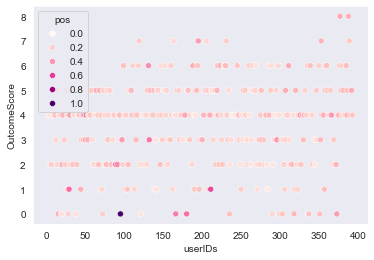

In [41]:
sns.scatterplot(x = user_sentiments.index, y = user_sentiments.OutcomeScore,hue = user_sentiments.pos, palette = 'RdPu')

Must now figure out how to change the size by number of messages per user in order to give more value to the individuals that sent more messages

In [42]:
byuser = data.groupby(['userIDs']).count()
byuser

,Unnamed: 0,implementation,Line_ID,ChatGroup,content,group_id,RoleName,roomName,m_experimental_testing,m_making_design_choices,m_asking_questions,j_customer_consultants_requests,j_performance_parameters_requirements,j_communication,OutcomeScore,wordCount,topic,bettergroupname
userIDs,,,,,,,,,,,,,,,,,,
2,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65,65
3,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
4,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
5,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45,45
6,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
390,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48
391,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51,51


<AxesSubplot:xlabel='userIDs', ylabel='OutcomeScore'>

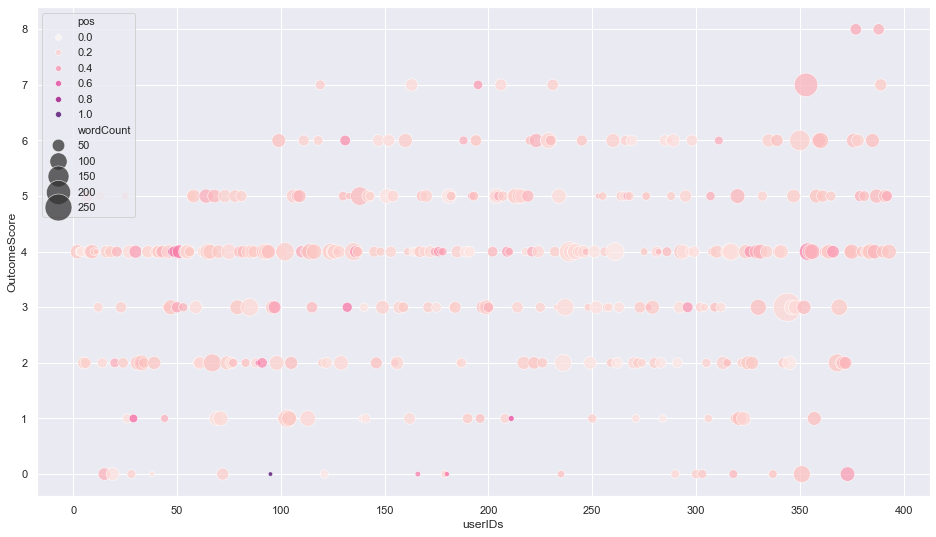

In [43]:
sns.set(rc = {'figure.figsize':(16,9)})
sns.scatterplot(x = user_sentiments.index, y = user_sentiments.OutcomeScore,hue = user_sentiments.pos, size = byuser.wordCount, sizes=(20, 800),alpha = .75, palette = 'RdPu')

Week 10: graphed scatterplot on sentiment analysis, started looking into filtering stop words, observing use of content words
Start looking at the amount of messages each member sent.

In [44]:
user_sentiments.drop(['sums','compound'],axis = 1)

,neg,neu,pos,OutcomeScore
userIDs,,,,
2,0.041415,0.703785,0.239415,4.0
3,0.049909,0.764182,0.095000,4.0
4,0.087226,0.769161,0.111355,4.0
5,0.069044,0.694511,0.191978,2.0
6,0.072351,0.723676,0.204000,2.0
...,...,...,...,...
389,0.024152,0.750130,0.225696,7.0
390,0.026750,0.713667,0.259583,4.0
391,0.034647,0.693824,0.271529,5.0
